## 148_1011

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [2]:
file_path = 'D:/MSBA7024/複本 148_1011.xlsx'
data = pd.read_excel(file_path, None) 
data.keys()

dict_keys(['商品明細報表'])

In [3]:
df = pd.read_excel(file_path, sheet_name='商品明細報表')
df.head()

,Sample Transaction Data - 2023 Aug ( Non Salesday - 1小時 - 非繁忙時段),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,門店編碼,銷售單號 (N),DEPARTMENT名稱,SECTION,SECTION名稱,商品名稱,貨號 (N),銷售價,數量,會員ID (N)
1,001,****5443369702,FOOD & DELICA,131,GROCERY,維他蒸餾水,***2589851,3.5,1,NaN
2,001,****5443377218,FOOD & DELICA,136,FISH,飛魚子,***0948356,31.7,1,NaN
3,001,****5443381605,FOOD & DELICA,134,DAILY,澳洲保利 脫脂鮮奶,***2473429,42.5,1,*******1751342
4,001,****5443381605,FOOD & DELICA,134,DAILY,墨爾本 三文治芝士片,***2744159,29.9,1,*******1751342


## EDA

In [5]:
# Rename column
df.columns = ['store_code', 'sales_order', 'department', 'section_code', 'section_name', 'product_name', 'product_code', 'sales_price', 'quantity', 'member_id']

# Delete missing values
df.dropna(subset=['product_code', 'sales_price', 'quantity'], inplace=True)

df['sales_price'] = pd.to_numeric(df['sales_price'], errors='coerce')
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')

df['member_id'] = df['member_id'].fillna('Unknown')

# Delete the first row
df = df.iloc[1:].reset_index(drop=True)

df.head()

,store_code,sales_order,department,section_code,section_name,product_name,product_code,sales_price,quantity,member_id
0,001,****5443377218,FOOD & DELICA,136,FISH,飛魚子,***0948356,31.7,1.0,Unknown
1,001,****5443381605,FOOD & DELICA,134,DAILY,澳洲保利 脫脂鮮奶,***2473429,42.5,1.0,*******1751342
2,001,****5443381605,FOOD & DELICA,134,DAILY,墨爾本 三文治芝士片,***2744159,29.9,1.0,*******1751342
3,001,****5443381605,FOOD & DELICA,131,GROCERY,UCC 即溶咖啡NO.114,***2051563,49.9,1.0,*******1751342
4,001,****5443381605,FOOD & DELICA,135,PRODUCE,中國南瓜,***0151720,25.8,1.0,*******1751342


## group data by product, sales etc.

In [24]:
# Group by product
product_sales = df.groupby('product_name').agg({
    'sales_price': 'sum',
    'quantity': 'sum'
}).reset_index()

# Group by store
store_sales = df.groupby('store_code').agg({
    'sales_price': 'sum',
    'quantity': 'sum'
}).reset_index()

# Group by member
member_sales = df.groupby('member_id').agg({
    'sales_price': 'sum',
    'quantity': 'sum'
}).reset_index()

product_sales.head()

,product_name,sales_price,quantity
0,"""MILK SECRET"" 1.5%半脫脂牛奶",41.4,3.0
1,"""MILK SECRET"" 3.5%全脂牛奶1公升",13.8,1.0
2,$50 GIFT CERTIFICATE,300.0,6.0
3,'西班牙 COREN 栗飼豬腩,130.0,2.0
4,(CON) ACTIVE MINDS BOOK EVENT,30.0,1.0


In [25]:
store_sales.head()

,store_code,sales_price,quantity
0,001,67841.7,2577.0
1,002,25066.9,586.0
2,003,3944.7,197.0
3,004,30063.6,523.0
4,005,10883.5,495.0


In [26]:
member_sales.head()

,member_id,sales_price,quantity
0,*******1734261,153.6,8.0
1,*******1735007,14.0,5.0
2,*******1735097,99.0,1.0
3,*******1735648,238.8,18.0
4,*******1736987,94.6,4.0


## visualization

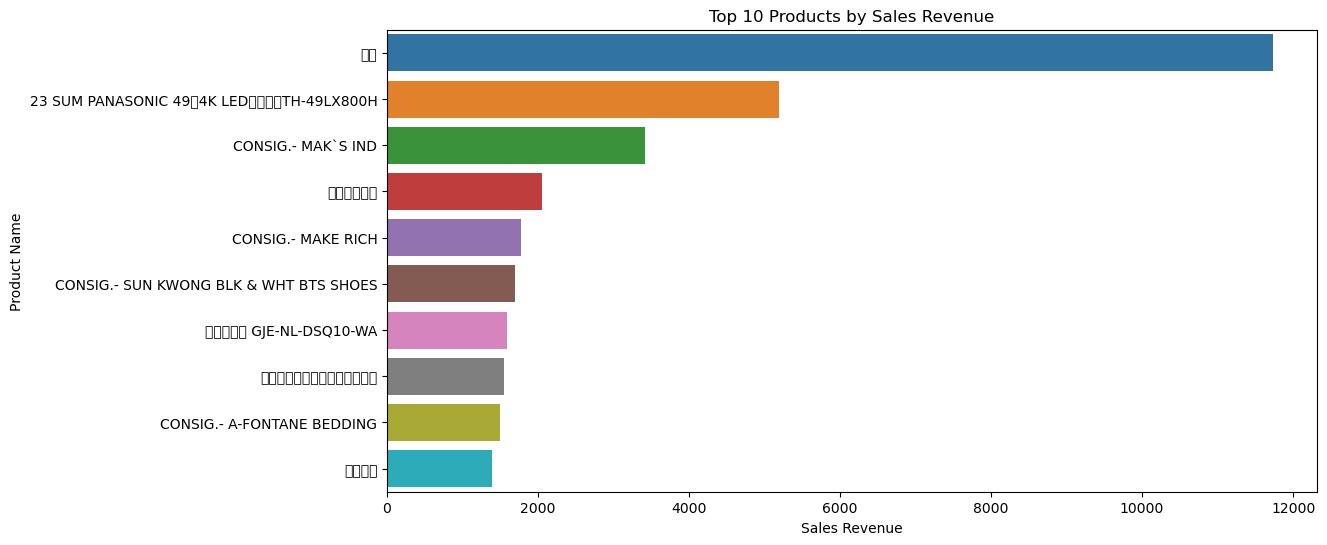

In [16]:
# Product sales
top_products = product_sales.nlargest(10, 'sales_price')

plt.figure(figsize=(12, 6))
sns.barplot(x='sales_price', y='product_name', data=top_products)
plt.title('Top 10 Products by Sales Revenue')
plt.xlabel('Sales Revenue')
plt.ylabel('Product Name')
plt.show()

In [18]:
top_products

,product_name,sales_price,quantity
2437,扭蛋,11730.0,1.0
81,23 SUM PANASONIC 49吋4K LED智能電視TH-49LX800H,5190.0,1.0
324,CONSIG.- MAK`S IND,3417.0,4.0
2442,挪威三文魚柳,2050.7,35.0
323,CONSIG.- MAKE RICH,1778.0,3.0
333,CONSIG.- SUN KWONG BLK & WHT BTS SHOES,1695.0,5.0
3613,象印電飯煲 GJE-NL-DSQ10-WA,1588.0,1.0
3115,牛頭牌不銹鋼加厚底電木單柄煲,1548.0,7.0
294,CONSIG.- A-FONTANE BEDDING,1497.0,3.0
3096,燒味精選,1394.0,45.0


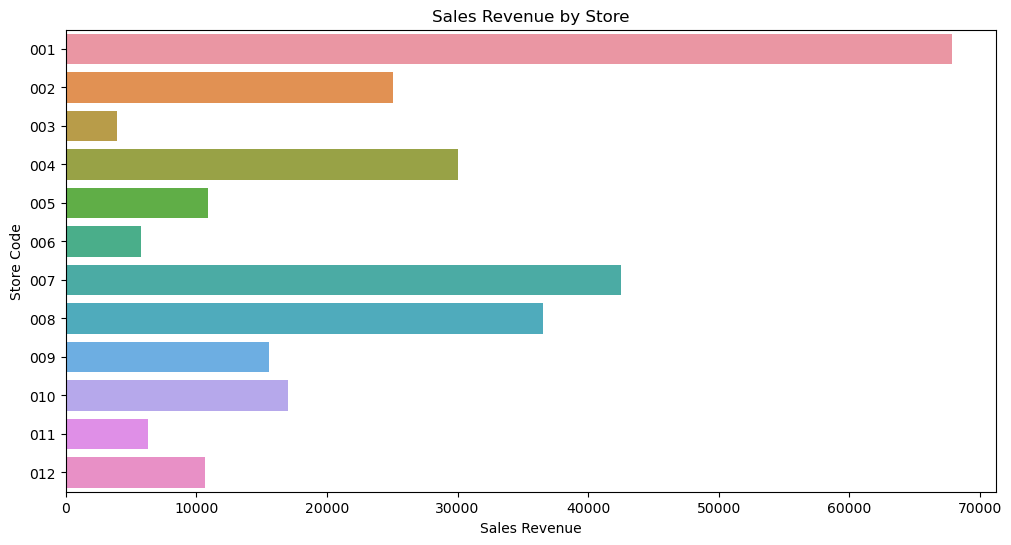

In [17]:
# Store sales
plt.figure(figsize=(12, 6))
sns.barplot(x='sales_price', y='store_code', data=store_sales)
plt.title('Sales Revenue by Store')
plt.xlabel('Sales Revenue')
plt.ylabel('Store Code')
plt.show()

## customer segment

In [27]:
# Purchase frequency and total consumption
df_member = df[df['member_id'] != 'Unknown']
member_sales_drop = member_sales[member_sales['member_id'] != 'Unknown']
member_sales_drop['purchase_frequency'] = df_member.groupby('member_id').size().values
member_sales_drop['total_spent'] = member_sales_drop['sales_price']

member_sales_drop['customer_segment'] = pd.qcut(member_sales_drop['total_spent'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

member_sales_drop

,member_id,sales_price,quantity,purchase_frequency,total_spent,customer_segment
0,*******1734261,153.6,8.0,6,153.6,High
1,*******1735007,14.0,5.0,2,14.0,Low
2,*******1735097,99.0,1.0,1,99.0,High
3,*******1735648,238.8,18.0,14,238.8,Very High
4,*******1736987,94.6,4.0,4,94.6,High
...,...,...,...,...,...,...
673,*******2853165,20.0,1.0,1,20.0,Low
674,*******2854178,305.0,18.0,15,305.0,Very High
675,*******2854179,20.0,1.0,1,20.0,Low
676,*******2855167,100.0,1.0,1,100.0,High


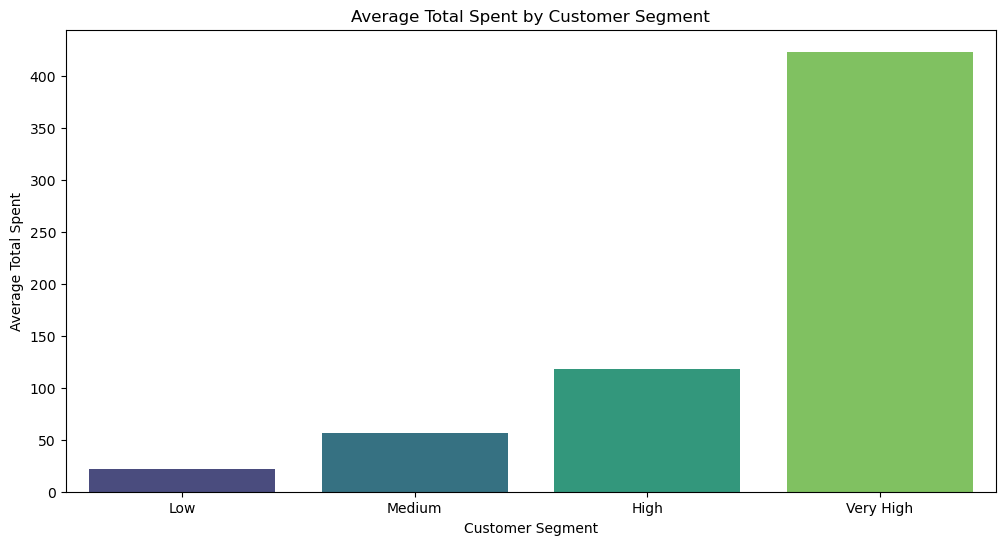

In [31]:
# Average spent of different segment
avg_spent_per_segment = member_sales_drop.groupby('customer_segment')['total_spent'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='customer_segment', y='total_spent', data=avg_spent_per_segment, palette='viridis')
plt.title('Average Total Spent by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Total Spent')
plt.show()

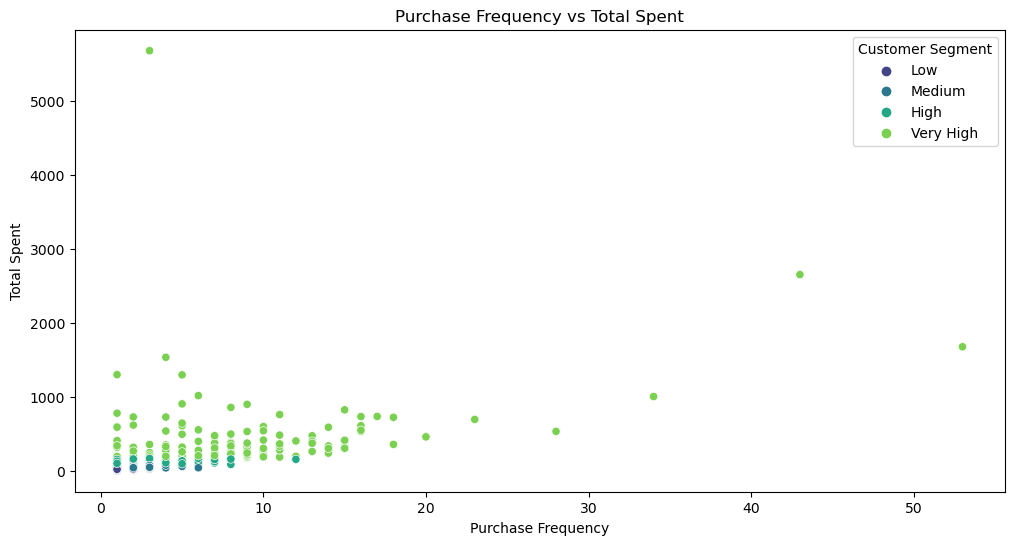

In [32]:
# Purchase Frequency vs Total Spent
plt.figure(figsize=(12, 6))
sns.scatterplot(x='purchase_frequency', y='total_spent', hue='customer_segment', data=member_sales_drop, palette='viridis')
plt.title('Purchase Frequency vs Total Spent')
plt.xlabel('Purchase Frequency')
plt.ylabel('Total Spent')
plt.legend(title='Customer Segment')
plt.show()

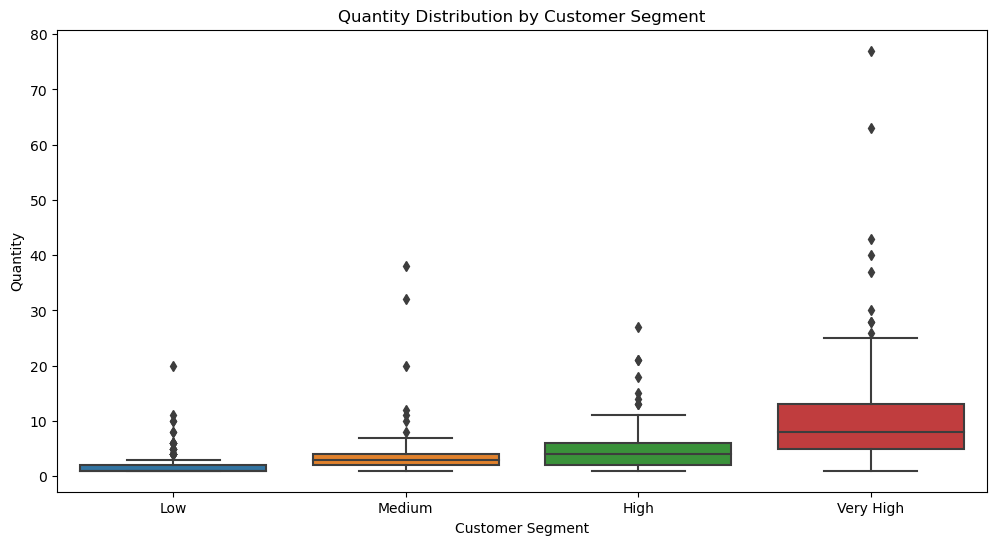

In [33]:
# Quantity Distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='customer_segment', y='quantity', data=member_sales_drop)
plt.title('Quantity Distribution by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Quantity')
plt.show()